In [1]:

import matplotlib
matplotlib.use('MacOSX')

import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

from tracer import *


embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


In [2]:

from dask.distributed import Client
client = Client('127.0.0.1:8786')
atlas = AtlasLoader('/home/carmena/WHS_SD_rat_atlas_v4', 'v4', use_dask=True)


/usr/local/lib/python3.7/site-packages/distributed/client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+----------------+
| Package     | client        | scheduler     | workers        |
+-------------+---------------+---------------+----------------+
| blosc       | 1.10.2        | 1.10.2        | None           |
| cloudpickle | 1.5.0         | 1.5.0         | 2.0.0          |
| msgpack     | 1.0.0         | 1.0.0         | 1.0.3          |
| pandas      | 1.1.3         | 1.1.3         | 1.3.5          |
| python      | 3.7.6.final.0 | 3.7.6.final.0 | 3.7.11.final.0 |
| toolz       | 0.10.0        | 0.10.0        | 0.11.2         |
| tornado     | 6.0.3         | 6.0.3         | 6.1            |
+-------------+---------------+---------------+----------------+
Notes: 
-  msgpack: Variation is ok, as long as everything is above 0.6
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [17]:

folder = os.path.expanduser('~/Desktop/VSDS_images/all_probes')
v = vis_registered_probes(atlas, probe_folder=os.path.expanduser(folder))



KeyboardInterrupt: 

In [45]:
(665 - 623) * v.atlas.pixdim


1.640625

In [58]:

v.vis2d_all(lw=0.5, bg_color=(255, 255, 255))


(512, 512, 3)
c: Plotting [11.405076479041675, 11.556199681519901], [7.956808943272462, 16.169076284412235]
c: Plotting [11.583823311407713, 11.632578032600074], [7.224451171156046, 16.091379515829484]
c: Plotting [11.125521460391337, 11.315486487539992], [7.465087577834543, 16.22556099010691]
c: Plotting [11.351864315535828, 11.718544716555625], [7.52938468864675, 16.28508798589516]
c: Plotting [11.042318918588705, 11.514684265338444], [7.388615119686998, 16.0922634796658]
c: Plotting [11.007315180575075, 11.714977958550268], [6.70291240948645, 16.010771815410042]
(512, 1024, 3)
s: Plotting [26.34200576770375, 26.031600697353365], [7.956808943272462, 16.169076284412235]
s: Plotting [25.7811071995515, 26.259998467201214], [7.224451171156046, 16.091379515829484]
s: Plotting [24.658574739188246, 25.858787950508205], [7.465087577834543, 16.22556099010691]
s: Plotting [27.44437257746, 25.520240913664868], [7.52938468864675, 16.28508798589516]
s: Plotting [25.670432048117625, 26.33303530478

In [56]:

foo = np.zeros((512, 512, 3))

foo[3, 3, :] = [128, 128, 128]

np.argwhere((foo.reshape((-1, 3)) == (128, 128, 128)).all(axis=1)).ravel()


array([1539])

In [19]:
plt.close('all')


In [9]:
plt.show()


In [3]:

folder = os.path.expanduser('~/Desktop/VSDS_images/Delfin/processed/probes')
v = vis_registered_probes(atlas, probe_folder=os.path.expanduser(folder))



j=0: probe_name=probe0; 16593 pts for probe across 1 traces
Determining insertion point for probe None
Insertion point in pixels:  295.83871184690946 666.4089778522462 413.9283528809532
('n', 1)


In [14]:
v.vis2d()

  1%|          | 3/300 [00:00<00:12, 23.74it/s]



Analyze purple probe: 
 
Probe length: 8.22 mm 

Estimated purple probe insertion angle: 
-2.16 degrees in the anterior direction
1.05 degrees in the lateral direction

Processing segmentation regions.


100%|██████████| 300/300 [00:18<00:00, 16.48it/s]


  Channels   Regions traversed                                       Initials
----------  -------------------------------------------------------  -------------
       220  Primary motor area                                       P m a
        76  corpus callosum and associated subcortical white matter  c c a a s w m
       306  Caudate putamen                                          C p
        58  Nucleus accumbens, core                                  N a c
        52  anterior commissure, anterior limb                       a c a l
        38  Nucleus accumbens, core (2)                              N a c
        54  Nucleus accumbens, shell                                 N a s
Determining insertion point for probe 0
Insertion point in pixels:  295.83871184690946 666.4089778522462 413.9283528809532
Analyze probe: 

 Probe length: 8.22 mm 

Estimated probe insertion angle:  
-2.16 degrees in the anterior direction 
1.05 degrees in the lateral direction

Insertion point into corte

In [12]:
v.vis3d()

2


In [22]:

i = 0
line_fit = getattr(v.LINE_FIT, v.color_used[0])
Length = getattr(v.LENGTH, v.color_used[i])
print(line_fit)

print('Processing segmentation regions.')
# for t in np.linspace(0, Length[1], 10):
#     x, y, z = line_fit.to_point(t)
#     region = v.atlas.segmentation_region(x=int(x), y=int(y), z=int(z))['name']
#     print('\t'.join([str(k) for k in [x, y, z, region]]))

# Approximate insertion point into cortex:
t = 0
while True:
    x, y, z = line_fit.to_point(t)
    if z >= atlas.shape[2]:
        t += 1
        break
    t -= 1

start_t = t
x, y, z = line_fit.to_point(start_t)
region = v.atlas.segmentation_region(x=int(x), y=int(y), z=int(z))['name']
assert region == 'Clear Label'

t = 0
while True:
    x, y, z = line_fit.to_point(t)
    region = v.atlas.segmentation_region(x=int(x), y=int(y), z=int(z))['name']
    if region != 'Clear Label':
        print(t)
        print('\t'.join([str(k) for k in [x, y, z, region]]))
        assert region == 'neocortex'
        break
    t += Length[1]/1000.0

end_t = t

# Find the earliest point between start_t and end_t where it intersects the cortex
print(start_t, end_t)
for t in np.linspace(start_t, end_t, 200):
    x, y, z = line_fit.to_point(t)
    region = v.atlas.segmentation_region(x=int(x), y=int(y), z=int(z))['name']
    if region != 'Clear Label':
        print(t)
        assert region == 'neocortex'
        break

x_insertion, y_insertion, z_insertion = line_fit.to_point(t)
print(x_insertion, y_insertion, z_insertion)

pixdim = atlas.pixdim
AP = (y_insertion - atlas.bregma_y_index) * pixdim
ML = (x_insertion - 266) * pixdim
# Z = y_insertion - 440 * pixdim
print(f'AP={AP:1.4f}, ML={abs(ML):1.4f}')





Line(point=Point([297.16650979, 662.96089137, 408.34313841]), direction=Vector([-0.04270987,  0.12124312, -0.99170357]))
Processing segmentation regions.
0
297.16650978643315	662.9608913732357	408.3431384096195	neocortex
-104 0
-6.271356783919586
297.4343586067669 662.2005325289082 414.5624653304778
AP=0.3594, ML=1.2279


In [4]:


v.vis3d()


2


In [2]:

from dask.distributed import Client
client = Client('127.0.0.1:8786')
atlas = AtlasLoader('/home/carmena/WHS_SD_rat_atlas_v4', 'v4', use_dask=True)


/usr/local/lib/python3.7/site-packages/distributed/client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+----------------+
| Package     | client        | scheduler     | workers        |
+-------------+---------------+---------------+----------------+
| blosc       | 1.10.2        | 1.10.2        | None           |
| cloudpickle | 1.5.0         | 1.5.0         | 2.0.0          |
| msgpack     | 1.0.0         | 1.0.0         | 1.0.3          |
| pandas      | 1.1.3         | 1.1.3         | 1.3.5          |
| python      | 3.7.6.final.0 | 3.7.6.final.0 | 3.7.11.final.0 |
| toolz       | 0.10.0        | 0.10.0        | 0.11.2         |
| tornado     | 6.0.3         | 6.0.3         | 6.1            |
+-------------+---------------+---------------+----------------+
Notes: 
-  msgpack: Variation is ok, as long as everything is above 0.6
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


0.3041391372680664


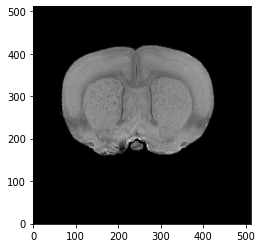

In [24]:

fig, ax = plt.subplots()
import time

start = time.time()
p = atlas.plane(y=650, angle=0)
print(time.time() - start)

ax.imshow(p.T, cmap='gray', origin='lower')
plt.show()



In [ ]:

# FIGURE OUT OUR CHANNEL COLORS:
def hex_to_rgb(hex):
    hex = hex.strip('#')
    return tuple((int(hex[i:i + 2], 16)) / 255 for i in (0, 2, 4))

# FROM CZI:
# [('DsRed', '#FF8100'), ('DAPI', '#00A0FF')]

DAPI_COLOR = hex_to_rgb('#00A0FF')
DAPI_COLOR /= np.linalg.norm(DAPI_COLOR, 2)
DSRED_COLOR = hex_to_rgb('#FF8100')
DSRED_COLOR /= np.linalg.norm(DSRED_COLOR, 2)


In [2]:

histology = Image.open(os.path.join('/home/carmena/histology_preprocessed/Oso/', '2021_12_19__14_35__0018_s1.tif')).copy()
histology_np = np.array(histology)


NameError: name 'Image' is not defined

In [5]:

# TODO: compute angle with DAPI_COLOR and throw out all non-matching colors (get rid of DSRED and text scale bar)
histology_dapi = histology_np @ DAPI_COLOR

hist_counts, hist_edges = np.histogram(histology_dapi.ravel(), bins=100)

# From AJ Peters Histology code
import pandas as pd
hist_counts_smooth = pd.Series(hist_counts).rolling(3, min_periods=0).mean()
hist_counts_diff = np.append([0], np.diff(hist_counts_smooth))
min_diff_point = np.argmin(hist_counts_diff)
min_point = np.argmin(hist_counts[min_diff_point:]) + min_diff_point

fig, ax = plt.subplots()
ax.plot(hist_edges[1:], hist_counts)
thresh = hist_edges[min_point + 1] * 0.5
ax.axvline(thresh)
print('THRESHOLD', thresh)
thresholded_image = histology_dapi.copy()
thresholded_image[histology_dapi < thresh] = 0
thresholded_image[histology_dapi >= thresh] = 255

fig, ax = plt.subplots()
ax.imshow(thresholded_image, cmap='gray', origin='lower')



<IPython.core.display.Javascript object>

THRESHOLD 166.97747020491863


<IPython.core.display.Javascript object>

In [106]:

# import cv2 as cv
# fig, ax = plt.subplots()
# ax.imshow(cv.Canny(thresholded_image.astype(np.uint8), thresh, 255), cmap='gray', origin='lower')
# fig, ax = plt.subplots()
# ax.imshow(Image.fromarray(thresholded_image), cmap='gray', origin='lower')

from scipy import spatial
points = np.argwhere(histology_dapi >= thresh)
hull = spatial.ConvexHull(points)

fig, ax = plt.subplots()
ax.imshow(thresholded_image, cmap='gray', origin='lower')
ax.plot(points[hull.vertices,1], points[hull.vertices,0], 'r--', lw=2)
# ax.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')


<IPython.core.display.Javascript object>

In [20]:

histology = Image.open(os.path.join('/home/carmena/histology_preprocessed/Oso/', '2021_12_19__14_35__0018_s1.tif')).copy()
fig, ax = plt.subplots()
ax.imshow(histology)




<IPython.core.display.Javascript object>

In [24]:
fig, ax = plt.subplots()
ax.imshow(np.random.normal(size=((200, 200))))
# ax.scatter([10], [20], color='red')
ax.plot([10, 20], [20, 20], color='red')


<IPython.core.display.Javascript object>

In [29]:
ax.clear()
ax.imshow(Image.fromarray(np.random.randint(low=0, high=255, size=((5000, 5000))).astype(np.float)))
ax.plot([10, 500], [10, 500], color='red')


/tmp/ipykernel_540613/3244238120.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.imshow(Image.fromarray(np.random.randint(low=0, high=255, size=((5000, 5000))).astype(np.float)))


In [62]:
from tracer import preprocess_histology

histology_folder = '/home/carmena/histology_preprocessed/Oso'
fns = []
for f in os.listdir(histology_folder):
    if not f.endswith('.tif'):
        continue
    prefix = os.path.splitext(f)[0]
    if any([(prefix in f) for f in os.listdir(os.path.join(histology_folder, 'processed'))]):
        continue
    fns.append(f)

print(len(fns))
assert len(fns) > 0

print(fns[0])
plt.close('all')
f = fns.pop(0)
h = preprocess_histology(histology_folder=histology_folder, file_name=f, plane='c')


0


AssertionError: 

In [7]:
del register_probes; plt.close('all'); import gc; gc.collect()

489

In [6]:

register_probes = ProbesRegistration(atlas, processed_histology_folder=os.path.expanduser('~/Desktop/VSDS_images/Oso/processed'), plane='c')
register_probes



Processing file 2021_12_19__14_34__0009_s1.tif.

Controls: 

--------------------------- 

u: load saved transform and atlas location 

t: activate mode where clicks are logged for transform 

d: delete most recent transform point 

h: transform histology to adapt to the atlas 

b: simple overlay to scroll through brain regions 

p: overlay to the atlas 

x: save transform and current atlas location 

v: activate color atlas mode 


r: activate mode where clicks are logged for probe 

c: delete most recent probe point 

n: add a new probe 

w: enable probe viewer mode for current probe  

e: save current probe 

--------------------------- 


use scroll wheel to navigate the atlas 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
register_probes.ERRORS

AttributeError: 'ProbesRegistration' object has no attribute 'ERRORS'

In [58]:

X = atlas.atlas_data
# self.im.set_data(self.X[:, self.ind, :].T)
X.shape

fig, ax = plt.subplots()
ind = 500
ax.imshow(X[:, ind, :].T, cmap='gray', origin="lower")


<IPython.core.display.Javascript object>

In [123]:

from scipy import ndimage
from scipy.interpolate import RegularGridInterpolator

ind = 550
im = X[:, ind, :].T
im.shape

x = np.arange(X.shape[0])
# y = np.repeat(ind, X.shape[1])
# y = np.linspace(ind - 300, ind + 300, X.shape[1])
y = np.arange(X.shape[1])
# np.linspace(ind - 300, ind + 300, X.shape[1])
z = np.arange(X.shape[2])
# print(y)

interp = RegularGridInterpolator((x, y, z), X[:, :, :])
xg , zg = np.meshgrid(x, z, indexing='ij')
# Tile: ML axis tilt
# Repeat: DV axis til
degree_angle = -30
y_span_half = int(round(np.tan(degree_angle / 180 * np.pi) * X.shape[0] / 2))
y_span = (ind - y_span_half, ind + y_span_half)
coords = np.vstack((xg.ravel(), np.repeat(np.linspace(y_span[0], y_span[1], X.shape[0]), X.shape[2]), zg.ravel())).T
interped = interp(coords)
interped = interped.reshape((X.shape[0], X.shape[2]))
fig, ax = plt.subplots()
ax.imshow(interped[:, :].T, cmap='gray', origin="lower")
# ax.imshow(ndimage.rotate(im, 45), cmap='gray', origin="lower")
# rotated = ndimage.rotate(X[:, :, :].T, 10, axes=(0, 2))
fig, ax = plt.subplots()
ax.imshow(X[:, int(np.mean([ind, y_span[0]])), :].T, cmap='gray', origin="lower")
fig, ax = plt.subplots()
ax.imshow(X[:, int(np.mean([ind, y_span[1]])), :].T, cmap='gray', origin="lower")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:


v = vis_registered_probes(atlas, probe_folder='/home/carmena/histology_preprocessed/Oso/processed/probes')
v.vis2d()

NameError: name 'vis_registered_probes' is not defined

# Testing Alignment

In [3]:

import matplotlib
%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image, ImageSequence
im = Image.open(os.path.expanduser('~/Downloads/release_2/full_brain_exp.tif'))

from more_itertools import nth
page = nth(ImageSequence.Iterator(im), 10)
fig, ax = plt.subplots()
ax.imshow(page, cmap='gray')




<IPython.core.display.Javascript object>

In [8]:

from scipy.io import loadmat
import h5py
f = loadmat(os.path.expanduser('~/Downloads/release_2/full_brain/tatlas_0_0.mat'))

f.keys()

dict_keys(['__header__', '__version__', '__globals__', 'tatlas'])

In [23]:
from tracer.atlas_loader import _load_pixdim

_load_pixdim(os.path.expanduser('~/Downloads/WHS_SD_rat_atlas_v4_pack'), 'v4')


embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


0.0390625

1
2
4
6
9
10
13
14
16
18
21


(1130517, 3)


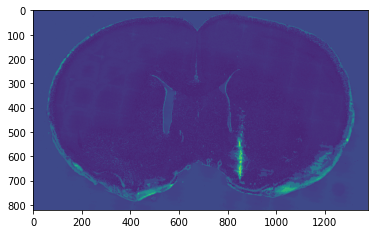

In [28]:

# np.unique(np.array(im.convert("RGB")).reshape((-1, 3)), return_counts=True, axis=0)
from sklearn.decomposition import PCA
im_size = np.array(im).shape
im_np = np.array(im.convert('RGB')).reshape((-1, 3))
pca = PCA()
ts = pca.fit_transform(im_np)
print(ts.shape)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(ts[:, 1].reshape((im_size[0], im_size[1])))



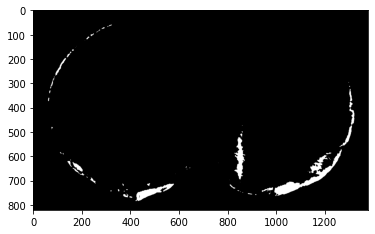

In [35]:
import numpy as np
import os
from PIL import Image
import h5py

def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull, Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

parent = os.path.expanduser("~/Desktop/VSDS_images/Elephante")
f = h5py.File(os.path.join(parent, 'processed', '2021_12_19__14_42__s0055_dsred_Simple Segmentation.h5'), 'r')
target_label = 1

im = f['exported_data'][:]
im = im.reshape((im.shape[0], im.shape[1]))
im_copy = np.zeros_like(im, dtype=np.uint8)
im_copy[im == 1] = 255
im_copy = Image.fromarray(im_copy, mode='L').convert('RGB')

fig, ax = plt.subplots()
ax.imshow(im_copy, cmap='gray')


In [36]:

import numpy as np
from PIL import Image

fns = []
parent = os.path.expanduser("~/Desktop/VSDS_images/Elephante")
for f in os.listdir(parent):
    if f.endswith('.tif'):
        fns.append(os.path.join(parent, f))
fns = sorted(fns)

def hex_to_rgb(hex):
    hex = hex.strip('#')
    return tuple((int(hex[i:i + 2], 16)) / 255 for i in (0, 2, 4))
DAPI_COLOR = hex_to_rgb('#00A0FF')
DAPI_COLOR /= np.linalg.norm(DAPI_COLOR, 2)
DSRED_COLOR = hex_to_rgb('#FF8100')
DSRED_COLOR /= np.linalg.norm(DSRED_COLOR, 2)


imlist = []
for fn in fns:
    im = Image.open(fn)
    if 'combined' not in fn:
        im.save(f'{os.path.splitext(fn)[0]}.png')
        for c, suffix in ((DAPI_COLOR, 'dapi'), (DSRED_COLOR, 'dsred')):
            Image.fromarray((np.array(im) @ c)).convert('LA').convert('RGB').save(f'{os.path.splitext(fn)[0]}_{suffix}.png')
    imlist.append(im)
imlist[0].save(
    os.path.join(parent, 'combined.tif'),
    compression="tiff_deflate",
    save_all=True,
    append_images=imlist[1:])


In [26]:


import h5py
import numpy as np
import matplotlib
%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image, ImageSequence


im = Image.open('/Users/pbotros/Desktop/VSDS_images/Elephante/2021_12_19__14_40__0045_s1_dsred_Simple Segmentation.png')
# print(im.mode)
# print(np.unique(np.array(im), return_counts=True))
im_np = np.array(im)
im_copy = np.zeros_like(im_np, dtype=np.uint8)
im_copy[im_np == 2] = 0
im_copy[im_np == 1] = 255
print(np.unique(np.array(im_copy), return_counts=True))
fig, ax = plt.subplots()
ax.imshow(Image.fromarray(im_copy, mode='L').convert('RGB'))
Image.fromarray(im_copy, mode='L').convert('RGB').save('/Users/pbotros/Desktop/VSDS_images/Elephante/2021_12_19__14_40__s0045_Simple Segmentation.png')


(array([  0, 255], dtype=uint8), array([1113370,   16280]))


<IPython.core.display.Javascript object>

In [13]:
import h5py
import numpy as np
import matplotlib
%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import Image, ImageSequence

f = h5py.File('/Users/pbotros/Desktop/VSDS_images/Elephante/2021_12_19__14_40__0046_s2_dsred_Simple Segmentation.h5', 'r')
im = f['exported_data'][:]
im = im.reshape((im.shape[0], im.shape[1]))
print(np.unique(im, return_counts=True))

im_copy = im.copy()
im_copy[im == 2] = 0.0
im_copy[im == 1] = 1.0

fig, ax = plt.subplots()
ax.imshow(im_copy, cmap='gray')



(array([1, 2], dtype=uint8), array([   378, 888972]))


<IPython.core.display.Javascript object>

In [22]:

atlas = f['tatlas']

fig, ax = plt.subplots()
ax.imshow(atlas[:, :, -300], cmap='gray')
# atlas.dtype

<IPython.core.display.Javascript object>

In [22]:

import os
import numpy as np

coordinates_json_file = os.path.join(os.path.expanduser('~/Desktop/VSDS_images/Elephante/processed/output/Coordinates'), 'Elephante_3D_combined.json')

import json

with open(coordinates_json_file, 'r') as f:
    coordinates_json = json.loads(f.read())
coordinates = []
for dd in coordinates_json:
    coordinates.append(np.array(dd['triplets'], dtype=np.float64).reshape((-1, 3)))
coordinates = np.vstack(coordinates)
coordinates


array([[296.418, 643.042, 392.159],
       [296.428, 643.13 , 391.807],
       [296.437, 643.218, 391.455],
       ...,
       [303.505, 678.635, 196.944],
       [303.497, 678.559, 197.245],
       [272.545, 647.41 , 232.353]])

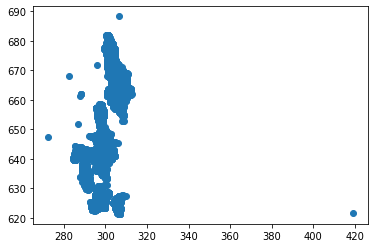

In [28]:


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(coordinates[:, 0], coordinates[:, 1])

